 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [141]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [142]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, index_col= 'Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [143]:
# Count nulls
whale_returns.isnull()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [144]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [145]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col= 'Date', infer_datetime_format=True, parse_dates=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [146]:
# Count nulls
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [147]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [148]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_path, index_col= 'Date', infer_datetime_format=True, parse_dates=True)
sp500_returns

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [149]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [150]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "")
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
sp500_returns["Close"]

/Users/alphathiaw/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [151]:
# Calculate Daily Returns
sp500_daily_return = sp500_returns.pct_change()
sp500_daily_return


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [152]:
# Drop nulls
sp500_returns = sp500_daily_return.dropna().copy()
sp500_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [153]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ['sp500 Close']
sp500_returns.columns
sp500_returns

,sp500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [154]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([whale_returns,algo_returns,sp500_returns], axis ='columns',join = 'inner' )
combined_portfolio.sort_index()
combined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

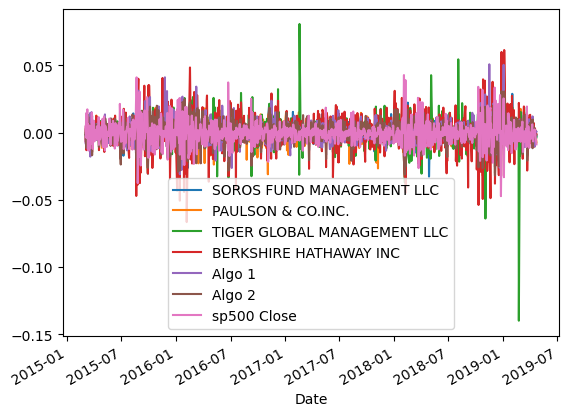

In [155]:
# Plot daily returns of all portfolios
combined_portfolio.plot()

#### Calculate and Plot cumulative returns.

In [156]:
# Calculate cumulative returns of all portfolios
cumultive_returns = (1 + combined_portfolio).cumprod()
cumultive_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562


<AxesSubplot:xlabel='Date'>

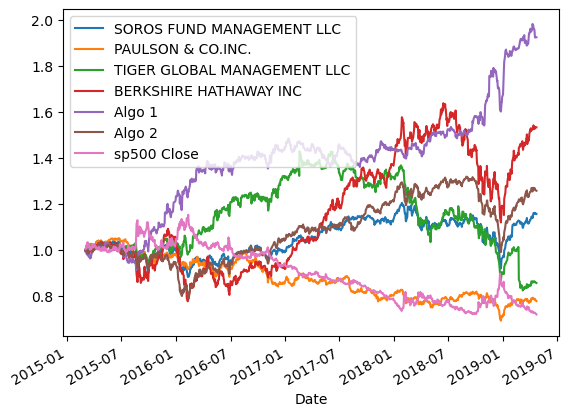

In [157]:
# Plot cumulative returns
cumultive_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

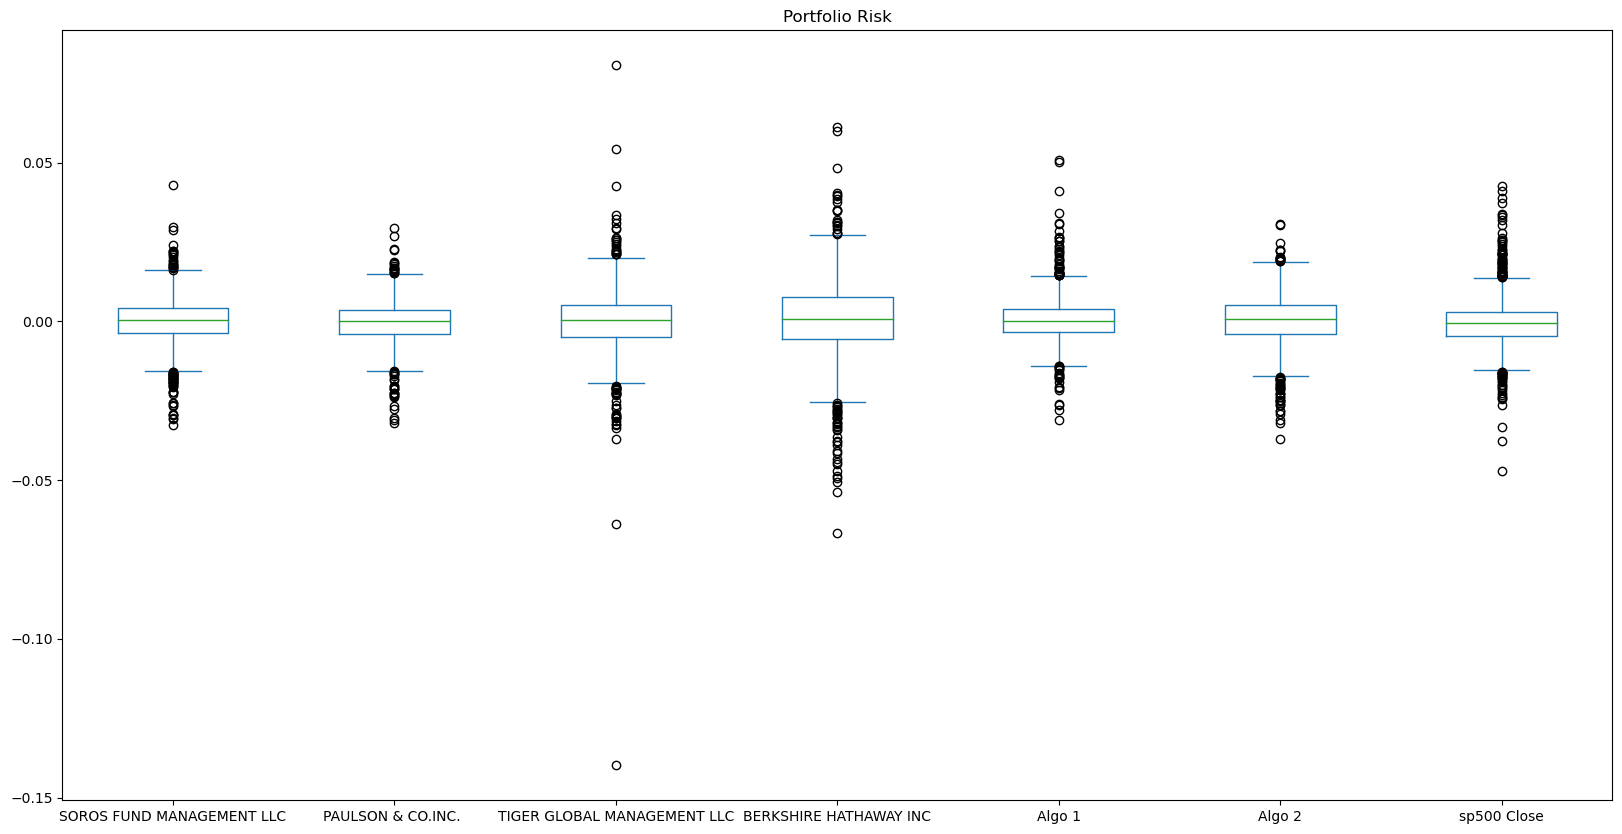

In [158]:
# Box plot to visually show risk
combined_portfolio.plot.box(figsize=(20, 10), title="Portfolio Risk")

### Calculate Standard Deviations

In [159]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolio.std()
daily_std = daily_std.sort_values(ascending = False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
sp500 Close                    0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [160]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_returns.std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
daily_std.std() > sp500_std

sp500 Close    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [161]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
sp500 Close                    0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

In [162]:
# Average std on combined portfolio
annual_std.mean()

0.14352500355124034

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

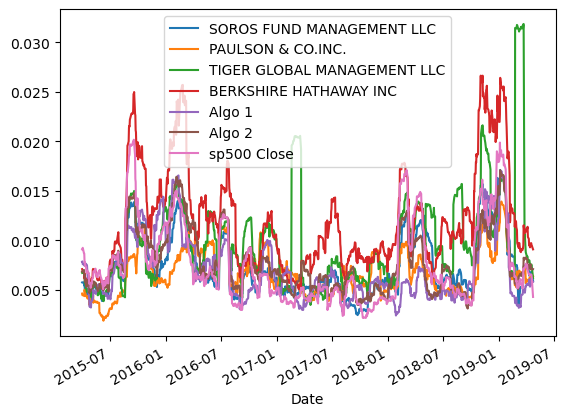

In [163]:
# Calculate and plo the rolling standard deviation for all portfolios using a 21-day window
combined_portfolio.rolling(window= 21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

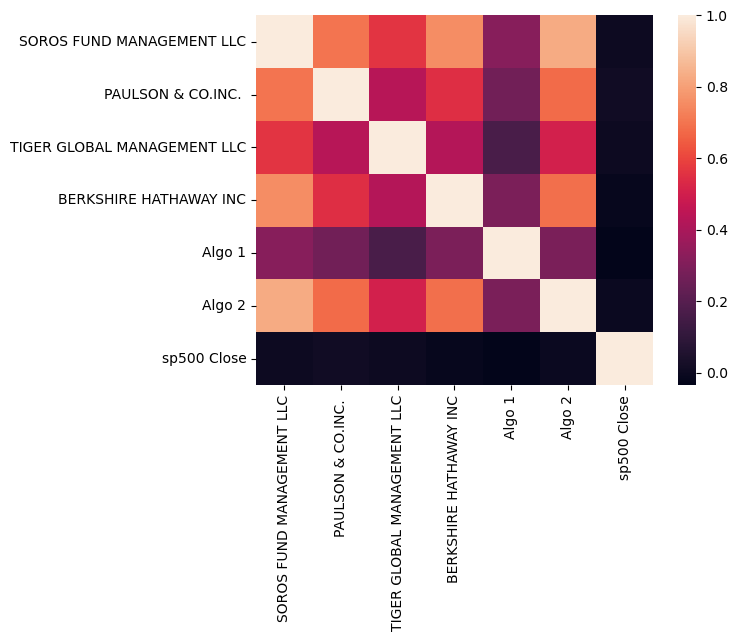

In [164]:
# Calculate the correlation
combined_portfolio_corr = combined_portfolio.corr()

# Display de correlation matrix
sns.heatmap(combined_portfolio_corr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [165]:
# Calculate covariance of a single portfolio
algo_covariance = combined_portfolio["Algo 1"].cov(combined_portfolio["sp500 Close"])
algo_covariance

# Calculate variance of S&P 500
sp500_variance = combined_portfolio["sp500 Close"].var()
sp500_variance
# Computing beta
algo_beta = algo_covariance / sp500_variance
algo_beta

# Plot beta trend



-0.03014921454233757

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [166]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Annualized Sharpe Ratios
combined_portfolio_sharp_ratio = ((combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252)))
combined_portfolio_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500 Close                   -0.518582
dtype: float64

<AxesSubplot:>

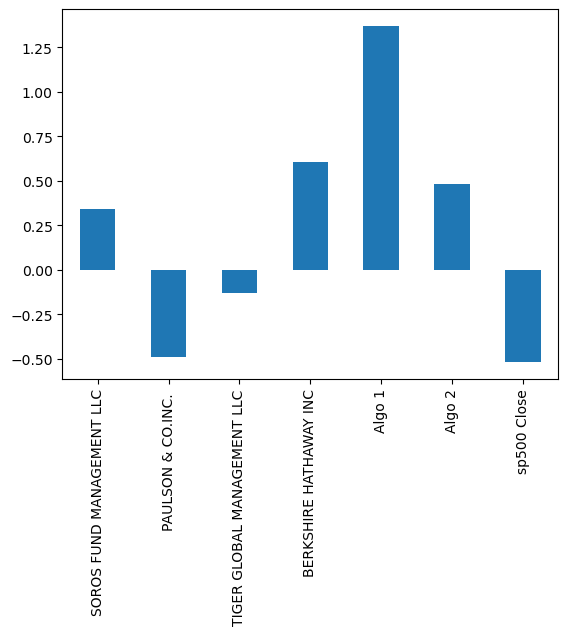

In [168]:
# Visualize the sharpe ratios as a bar plot
combined_portfolio_sharp_ratio.plot(kind= "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [169]:
# Reading Apple returns
apple_path = Path("./Resources/aapl_historical.csv")

apple = pd.read_csv(apple_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [170]:
# Reading Costco returns
costco_path = Path("./Resources/cost_historical.csv")
costco = pd.read_csv(costco_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [171]:
# Reading Google returns
goolgle_path = Path("./Resources/goog_historical.csv")
google = pd.read_csv(goolgle_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [172]:
# Combine all Apple, Costco and Google returns in same Dataframe
custom_portfolio = pd.concat([apple,costco,google], axis="columns", join="inner")
custom_portfolio


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [173]:
# Sort datetime index in ascending order (past to present)
custom_portfolio.sort_index(inplace=True)
custom_portfolio


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10


In [174]:
# Set Column names to 'aapl' , 'cost' and 'goog'
custom_portfolio.columns = ["Symbol","AAPL","Symbol", "COST","Symbol", "GOOG"]
custom_portfolio =  custom_portfolio.drop(columns =["Symbol", "Symbol"])

custom_portfolio

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [175]:
# Calculate daily returns
custom_returns = custom_portfolio.pct_change()
custom_returns

# Drop NAs
custom_returns.dropna(inplace=True)
custom_returns

# Display sample data
custom_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [176]:
# Average return on combined portfolio
combined_portfolio.mean()

SOROS FUND MANAGEMENT LLC      0.000171
PAULSON & CO.INC.             -0.000217
TIGER GLOBAL MANAGEMENT LLC   -0.000089
BERKSHIRE HATHAWAY INC         0.000494
Algo 1                         0.000658
Algo 2                         0.000254
sp500 Close                   -0.000281
dtype: float64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [177]:
# Calculate Portfolio returns with an equal amount of each stock
weights = [0.34, 0.33, 0.33]

# Calculate portfolio return
portfolio_returns = custom_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14   -0.000008
2018-05-15   -0.010054
2018-05-16    0.009403
2018-05-17   -0.001642
2018-05-18   -0.006036
dtype: float64

In [178]:
#Calculate average return on Custom portfolio return
portfolio_returns.mean()

0.0005835357546643787

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [179]:
# Join custom portfolio returns with original combined returns DataFrame
combined_portfolio["Custom"] = portfolio_returns

combined_portfolio


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007465
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000337
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009393


In [180]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.dropna(inplace=True)
combined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Close,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.000008
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010054
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001642
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006036
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007465
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000337
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009393


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [181]:
# Calculate the annualized `std` for custom portfolio
custom_ann_std = combined_portfolio['Custom'].std() * np.sqrt(252)
custom_ann_std

0.21216568155598484

### Calculate and plot rolling `std` with 21-day window

In [182]:
# Calculate and plot rolling standard deviation with 21-day window for custom portfolio
custom_21_std = combined_portfolio['Custom'].rolling(window= 21).std()
custom_21_std

Date
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-15    0.007612
2019-04-16    0.007531
2019-04-17    0.007696
2019-04-18    0.007512
2019-04-22    0.006550
Name: Custom, Length: 236, dtype: float64

<AxesSubplot:xlabel='Date'>

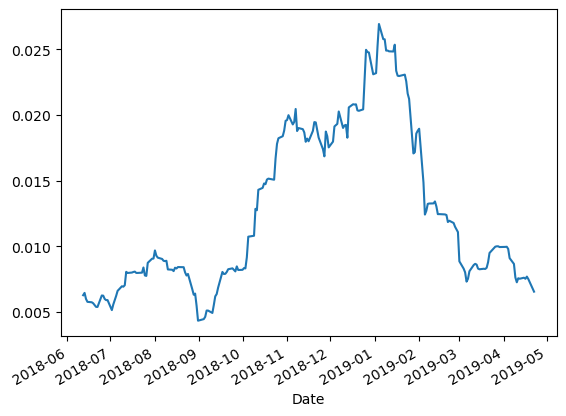

In [183]:
custom_21_std.plot()

### Calculate and plot the correlation

In [184]:
# Calculate and plot the correlation for 21-day window on custom portfolio
custom_21_corr = custom_returns.rolling(window=21).corr()
custom_21_corr


AAPL      COST      GOOG
Trade DATE                                   
2018-05-14 AAPL       NaN       NaN       NaN
           COST       NaN       NaN       NaN
           GOOG       NaN       NaN       NaN
2018-05-15 AAPL       NaN       NaN       NaN
           COST       NaN       NaN       NaN
...                   ...       ...       ...
2019-05-08 COST  0.038521  1.000000  0.029216
           GOOG  0.258281  0.029216  1.000000
2019-05-09 AAPL  1.000000 -0.005281  0.256798
           COST -0.005281  1.000000  0.016923
           GOOG  0.256798  0.016923  1.000000

[747 rows x 3 columns]

<AxesSubplot:ylabel='Trade DATE-None'>

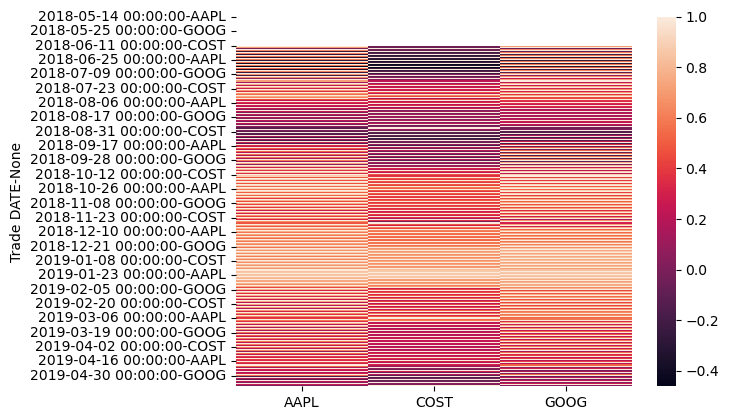

In [185]:
sns.heatmap(custom_21_corr)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [186]:

# Calculate and plot 60-day Beta compared to the S&P 500
apple_60_cov= combined_portfolio["Custom"].rolling(window=60).cov(combined_portfolio["sp500 Close"])

In [187]:
# Calculate Variance of S&P 500
sp500_variance = combined_portfolio["sp500 Close"].rolling(window=60).var()
sp500_variance

Date
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: sp500 Close, Length: 236, dtype: float64

In [188]:
# Beta equals covariance/variance
apple_beta = apple_60_cov/sp500_variance
apple_beta

Date
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-15    0.059382
2019-04-16    0.024781
2019-04-17    0.019027
2019-04-18    0.018661
2019-04-22   -0.003478
Length: 236, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [189]:
# Calculate Annualized Sharpe Ratios for custom porfolio
custom_sharp_ratio = ((custom_returns.mean() * 252) / (custom_returns.std() * np.sqrt(252)))
custom_sharp_ratio 


AAPL    0.361306
COST    1.160482
GOOG    0.349657
dtype: float64

AAPL    0.361306
COST    1.160482
GOOG    0.349657
dtype: float64

<AxesSubplot:>

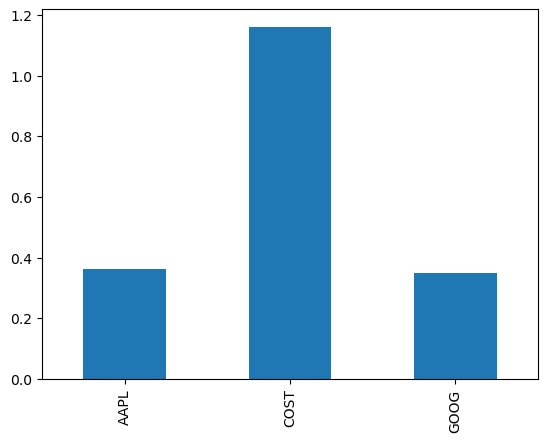

In [190]:
# Visualize the sharpe ratios as a bar plot
custom_sharp_ratio.plot(kind='bar')